# Topic: Insurance Sell Prediction
The aim of this project is to find out which feature is prominent for making prediction regarding     sell of insurance package and perform some EDA to find out hidden information in data to find some useful stuff.

#  Information about data

### id: Unique ID for the customer

### Gender: Gender of the customer

### Age: Age of the customer

### Driving_License: 0 : Customer does not have DL, 1 : Customer already has DL

### Region_Code: Unique code for the region of the customer

### Previously_Insured: 1 : Customer already has Vehicle Insurance,0: Customer doesn't have Vehicle Insurance

### Vehicle_Age: Age of the Vehicle

### Vehicle_Damage: 1 : Customer got his/her vehicle damaged in the past.0: Customer didn't get his/her vehicle damaged in he past.

### Annual_Premium: The amount customer needs to pay as premium in the year

### PolicySalesChannel: Anonymised Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.

### Vintage: Number of Days, Customer has been associated with the company

### Response: 1 : Customer is interested, 0 : Customer is not interested

## Importing some libraries

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression

In [2]:
## Loading the csv file

In [3]:
dataframe=pd.read_csv('insaurance_sell.csv',nrows=10000)
dataframe.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


## Performed EDA

### Relationship between Genders and Previously insured in context of damage of vehicle

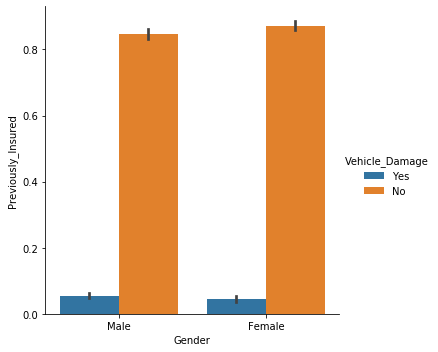

In [4]:
import seaborn as sns
sns.catplot(x='Gender',y='Previously_Insured',kind='bar',data=dataframe,hue='Vehicle_Damage')

### Took a sample of 100 data and find the relation between age and vintage(the no days at which customer is associated with company) in the context of Gender

In [5]:
df=pd.read_csv('insaurance_sell.csv',nrows=100)

Text(31.083472222222234, 0.5, 'No of days customer is associated with company')

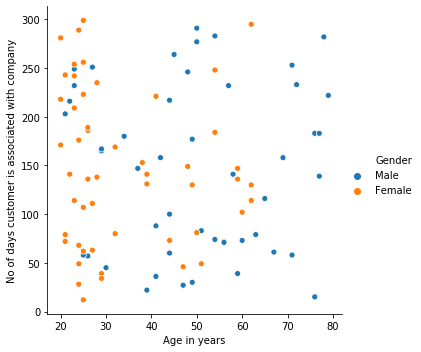

In [6]:
sns.relplot(x='Age',y='Vintage',data=df,hue='Gender')
plt.xlabel('Age in years')
plt.ylabel('No of days customer is associated with company')

### Realtionship between vehicle Age and Annual premium in accordance with Previously Insured

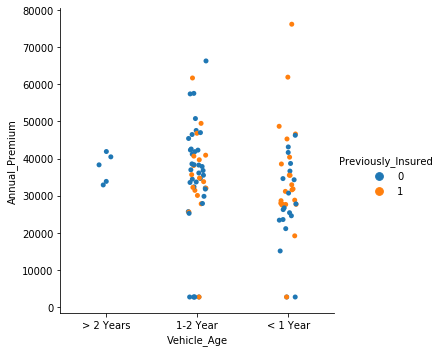

In [7]:
sns.catplot(x='Vehicle_Age',y="Annual_Premium",data=df,hue='Previously_Insured')

### Histogram for different columns

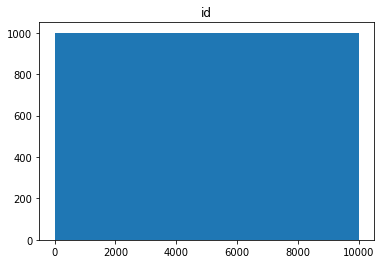

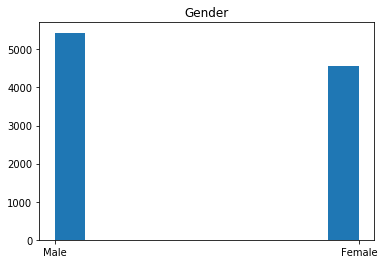

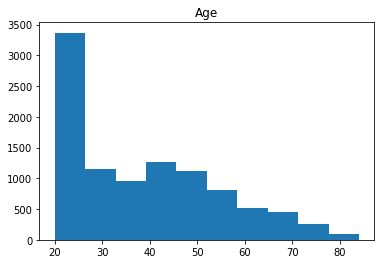

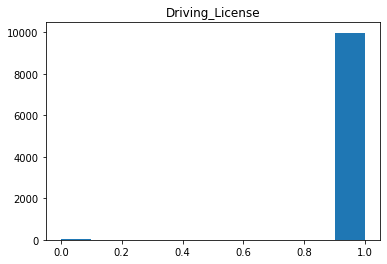

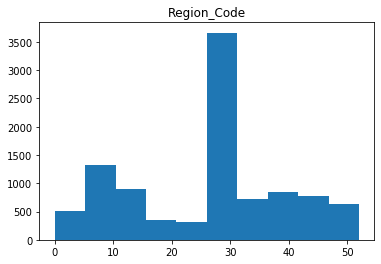

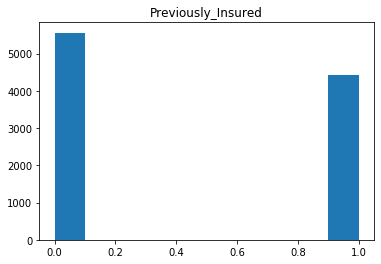

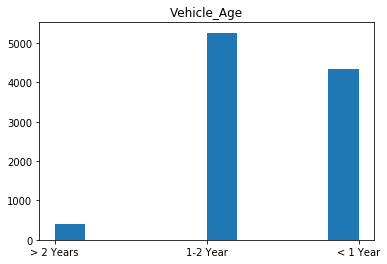

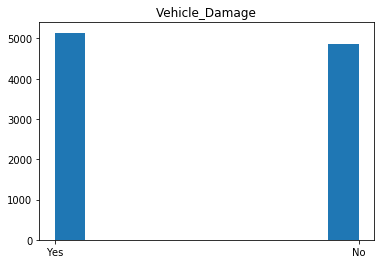

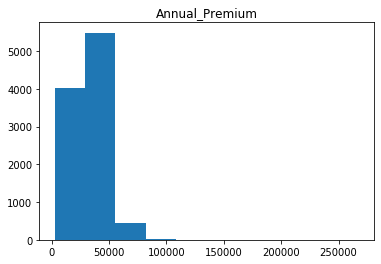

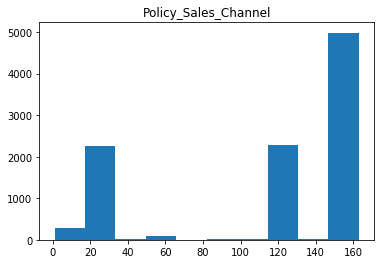

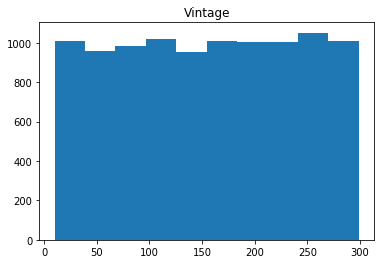

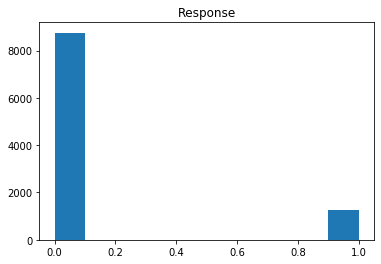

In [8]:
for i in dataframe.columns:
    plt.hist(dataframe[i])
    plt.title(i)
    plt.show()

### Pairplot to find all possible relationship between columns

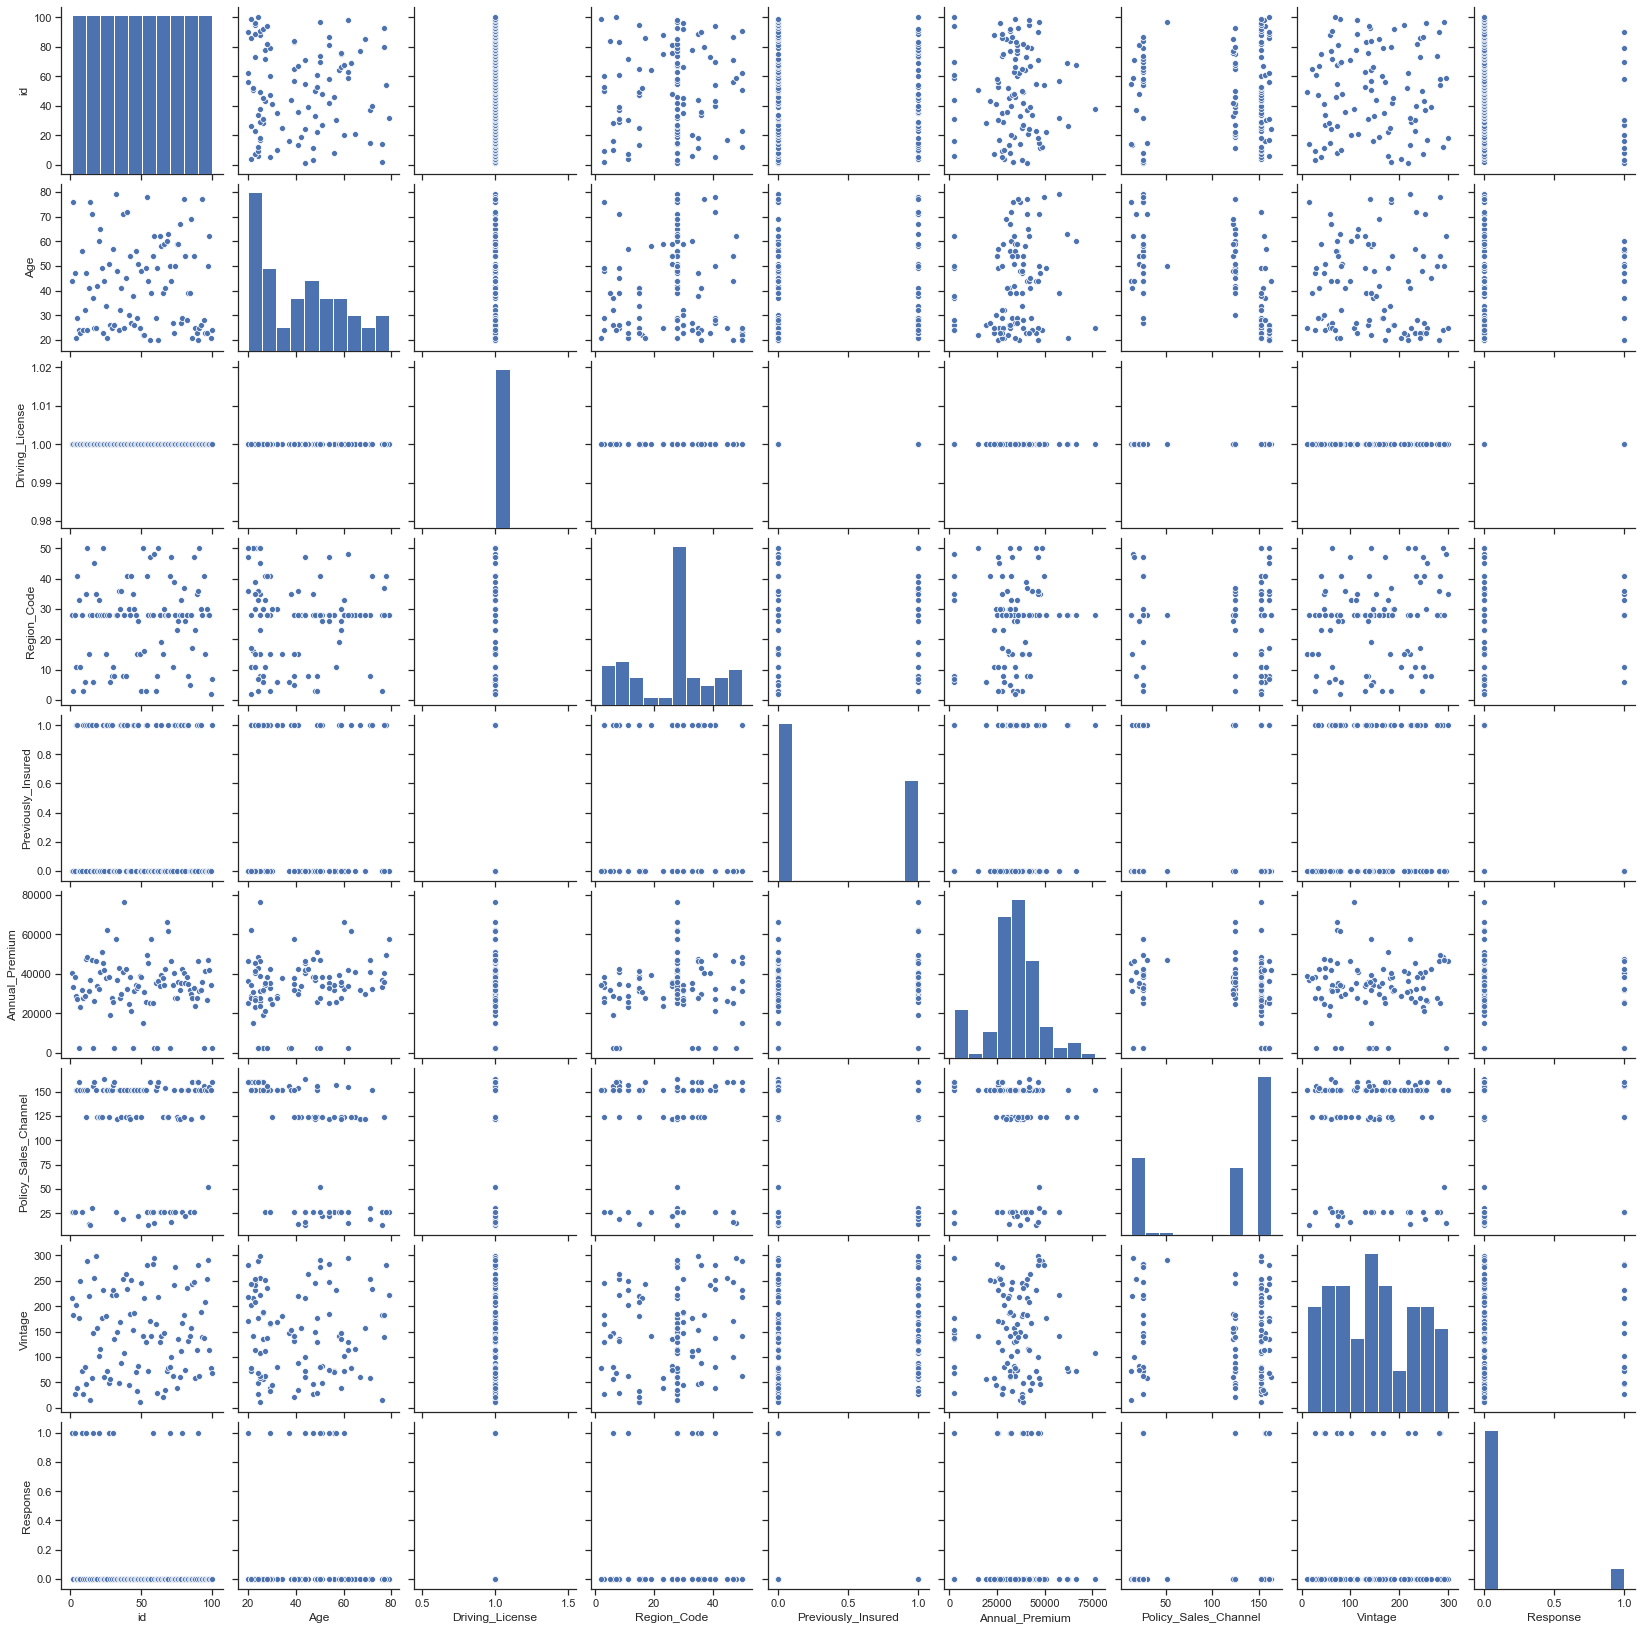

In [9]:
sns.set(style='ticks')
sns.pairplot(data=df)

## Performed feature engineering

In [10]:
dataframe.shape

(10000, 12)

In [11]:
gender=pd.get_dummies(dataframe['Gender'],drop_first=True)
dataframe['vehicle_damage']=pd.get_dummies(dataframe['Vehicle_Damage'],drop_first=True)

In [12]:
dataframe=pd.concat([dataframe,gender],axis=1)
dataframe.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,vehicle_damage,Male
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1,1,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0,0,1
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1,1,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0,0,1
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0,0,0


In [13]:
dataframe.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
vehicle_damage          0
Male                    0
dtype: int64

In [14]:
dataframe['Vehicle_Age'].unique()

array(['> 2 Years', '1-2 Year', '< 1 Year'], dtype=object)

In [15]:
def classification(x):
    if x=='> 2 Years' :
        return 2
    elif x=='1-2 Year':
        return 1
    else:
        return 0

In [16]:
df=pd.DataFrame(dataframe['Vehicle_Age'].apply(classification))
df.head()

,Vehicle_Age
0,2
1,1
2,2
3,0
4,0


In [17]:
pd.concat([dataframe,df],axis=1)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,vehicle_damage,Male,Vehicle_Age
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1,1,1,2
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0,0,1,1
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1,1,1,2
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0,0,1,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,Female,24,1,37.0,1,< 1 Year,No,21243.0,152.0,21,0,0,0,0
9996,9997,Male,28,1,35.0,1,< 1 Year,No,23589.0,160.0,173,0,0,1,0
9997,9998,Female,27,1,15.0,0,< 1 Year,Yes,33340.0,152.0,207,0,1,0,0
9998,9999,Female,28,1,14.0,1,< 1 Year,No,25426.0,152.0,247,0,0,0,0


In [18]:
dataframe.drop(['Gender','id','Vehicle_Age','Vehicle_Damage'],axis=1,inplace=True)

## Machine learning model implementation

In [19]:
from sklearn.model_selection import train_test_split
x=dataframe.drop(labels=['Response'],axis=1)
y=dataframe['Response']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state =10)

In [20]:
x_train

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,vehicle_damage,Male
7496,25,1,23.0,1,28015.0,152.0,289,0,0
7694,22,1,28.0,1,28495.0,152.0,68,0,0
9248,75,1,28.0,0,38031.0,124.0,137,1,1
2470,35,1,28.0,0,29775.0,124.0,75,1,0
4392,29,1,11.0,1,33748.0,152.0,84,0,1
...,...,...,...,...,...,...,...,...,...
9372,20,1,2.0,1,29543.0,160.0,248,0,1
7291,37,1,28.0,1,42197.0,152.0,21,0,1
1344,27,1,35.0,0,33230.0,163.0,240,1,1
7293,23,1,6.0,1,19578.0,152.0,104,0,0


In [21]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
rfc=RandomForestClassifier()

In [23]:
rfc.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

## To predict model accuracy

In [24]:
rfc.score(x_test,y_test)


0.8645

## Plotted confusion matrix for better visualisation of data

In [25]:
y_predicted=rfc.predict(x_test)

In [26]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[1705,   48],
       [ 223,   24]], dtype=int64)

<Figure size 360x216 with 0 Axes>

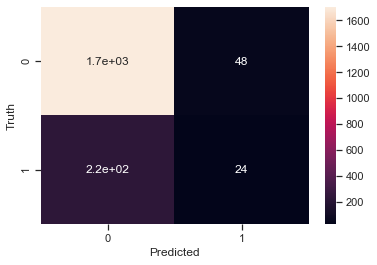

<Figure size 360x216 with 0 Axes>

In [27]:
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.figure(figsize=(5,3))

### Conclusion: Model worked well with Random forest classifier algorithm with around 86.6 % accuracy and found some useful stuff while executing EDA.

## Thank You